In [ ]:
# SVM KNN EVALUATION BREAST CANCER DATASET

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import os
os.getcwd()

'C:\\Users\\User\\Desktop\\Batch Weekend Feb_4th\\March_12_KNN_SVM'

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
df=pd.read_csv("BreastCancer.csv")
df.head()

,Id,Cl.thickness,Cell.size,Cell.shape,Marg.adhesion,Epith.c.size,Bare.nuclei,Bl.cromatin,Normal.nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1.0,3,1,1,0
1,1002945,5,4,4,5,7,10.0,3,2,1,0
2,1015425,3,1,1,1,2,2.0,3,1,1,0
3,1016277,6,8,8,1,3,4.0,3,7,1,0
4,1017023,4,1,1,3,2,1.0,3,1,1,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               699 non-null    int64  
 1   Cl.thickness     699 non-null    int64  
 2   Cell.size        699 non-null    int64  
 3   Cell.shape       699 non-null    int64  
 4   Marg.adhesion    699 non-null    int64  
 5   Epith.c.size     699 non-null    int64  
 6   Bare.nuclei      683 non-null    float64
 7   Bl.cromatin      699 non-null    int64  
 8   Normal.nucleoli  699 non-null    int64  
 9   Mitoses          699 non-null    int64  
 10  Class            699 non-null    int64  
dtypes: float64(1), int64(10)
memory usage: 60.2 KB


In [5]:
df["Class"].value_counts()

0    458
1    241
Name: Class, dtype: int64

In [ ]:
# there are two classes of tumor 1- Malignant and 0- benign

In [6]:
df["Class"].value_counts(normalize=True)

0    0.655222
1    0.344778
Name: Class, dtype: float64

In [7]:
df.drop(["Id"],axis=1,inplace=True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Cl.thickness     699 non-null    int64  
 1   Cell.size        699 non-null    int64  
 2   Cell.shape       699 non-null    int64  
 3   Marg.adhesion    699 non-null    int64  
 4   Epith.c.size     699 non-null    int64  
 5   Bare.nuclei      683 non-null    float64
 6   Bl.cromatin      699 non-null    int64  
 7   Normal.nucleoli  699 non-null    int64  
 8   Mitoses          699 non-null    int64  
 9   Class            699 non-null    int64  
dtypes: float64(1), int64(9)
memory usage: 54.7 KB


In [9]:
df.isnull().sum()

Cl.thickness        0
Cell.size           0
Cell.shape          0
Marg.adhesion       0
Epith.c.size        0
Bare.nuclei        16
Bl.cromatin         0
Normal.nucleoli     0
Mitoses             0
Class               0
dtype: int64

<AxesSubplot:xlabel='Bare.nuclei'>

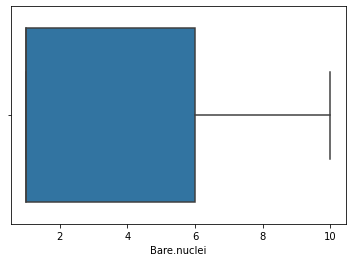

In [10]:
sns.boxplot(x=df["Bare.nuclei"])

In [11]:
df["Bare.nuclei"]=df["Bare.nuclei"].fillna(df["Bare.nuclei"].mean())

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Cl.thickness     699 non-null    int64  
 1   Cell.size        699 non-null    int64  
 2   Cell.shape       699 non-null    int64  
 3   Marg.adhesion    699 non-null    int64  
 4   Epith.c.size     699 non-null    int64  
 5   Bare.nuclei      699 non-null    float64
 6   Bl.cromatin      699 non-null    int64  
 7   Normal.nucleoli  699 non-null    int64  
 8   Mitoses          699 non-null    int64  
 9   Class            699 non-null    int64  
dtypes: float64(1), int64(9)
memory usage: 54.7 KB


In [ ]:
# corr matrix

In [13]:
corr=df.corr(method="spearman")
corr

,Cl.thickness,Cell.size,Cell.shape,Marg.adhesion,Epith.c.size,Bare.nuclei,Bl.cromatin,Normal.nucleoli,Mitoses,Class
Cl.thickness,1.000000,0.666463,0.664121,0.541593,0.583979,0.575350,0.538093,0.570398,0.418717,0.682452
Cell.size,0.666463,1.000000,0.891904,0.742517,0.787159,0.754716,0.719330,0.757199,0.508780,0.855487
Cell.shape,0.664121,0.891904,1.000000,0.711730,0.759234,0.744729,0.692316,0.725268,0.472749,0.836394
Marg.adhesion,0.541593,0.742517,0.711730,1.000000,0.667809,0.678587,0.624515,0.634310,0.446992,0.727995
Epith.c.size,0.583979,0.787159,0.759234,0.667809,1.000000,0.675704,0.639507,0.705997,0.480255,0.762731
Bare.nuclei,0.575350,0.754716,0.744729,0.678587,0.675704,1.000000,0.669415,0.648848,0.464049,0.818962
Bl.cromatin,0.538093,0.719330,0.692316,0.624515,0.639507,0.669415,1.000000,0.662309,0.386944,0.740350
Normal.nucleoli,0.570398,0.757199,0.725268,0.634310,0.705997,0.648848,0.662309,1.000000,0.504140,0.743823
Mitoses,0.418717,0.508780,0.472749,0.446992,0.480255,0.464049,0.386944,0.504140,1.000000,0.526766
Class,0.682452,0.855487,0.836394,0.727995,0.762731,0.818962,0.740350,0.743823,0.526766,1.000000


<AxesSubplot:>

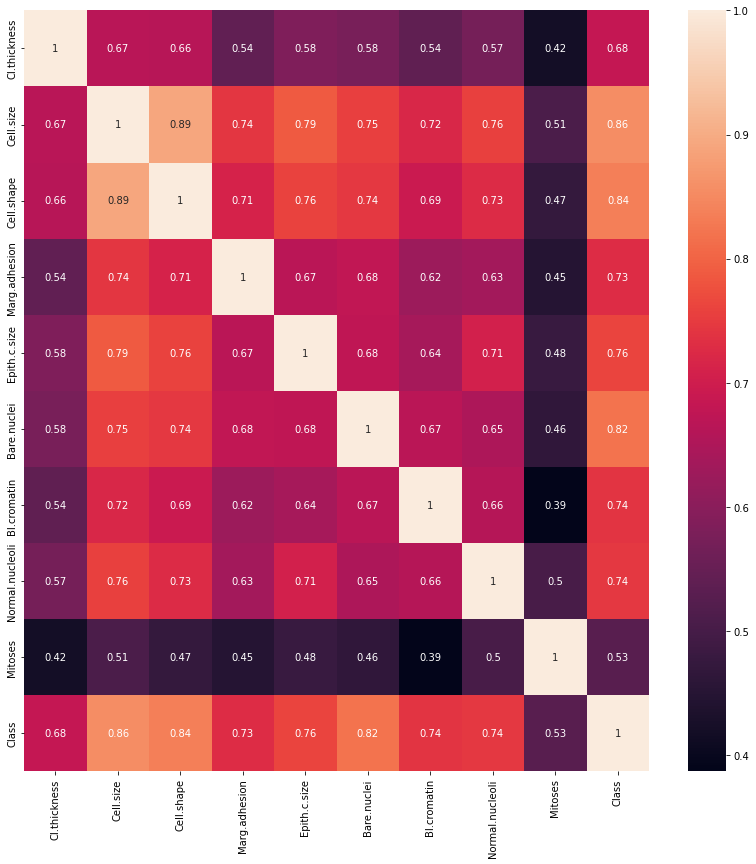

In [14]:
plt.figure(figsize=(14,14))
sns.heatmap(corr,annot=True)

In [ ]:
# here there is NO multi collinearity

In [15]:
# split into dependent and independent variable
X=df.drop("Class",axis=1)
Y=df["Class"]

In [17]:
# split the data in training and testing
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=100,stratify=Y)

In [19]:
# logistic regression
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(class_weight='balanced')

In [20]:
lr.fit(X_train,Y_train)


LogisticRegression(class_weight='balanced')

In [21]:
Y_pred_training=lr.predict(X_train)

In [22]:
Y_pred_test=lr.predict(X_test)

In [24]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_auc_score

In [25]:
print("training performance \n",accuracy_score(Y_train,Y_pred_training))

training performance 
 0.9749552772808586


In [26]:
print("testing performance \n",accuracy_score(Y_test,Y_pred_test))

testing performance 
 0.9642857142857143


# ROC AUC CURVE

In [86]:
probability_score=lr.predict_proba(X_test)

In [87]:
probability_score

array([[9.94949289e-01, 5.05071128e-03],
       [9.90768645e-01, 9.23135504e-03],
       [9.61469596e-01, 3.85304038e-02],
       [4.61910180e-06, 9.99995381e-01],
       [9.92020766e-01, 7.97923407e-03],
       [9.96903361e-01, 3.09663887e-03],
       [7.53760722e-02, 9.24623928e-01],
       [9.93429385e-01, 6.57061540e-03],
       [5.89594716e-03, 9.94104053e-01],
       [5.79456717e-04, 9.99420543e-01],
       [4.79106485e-01, 5.20893515e-01],
       [9.61183776e-01, 3.88162244e-02],
       [8.80669584e-02, 9.11933042e-01],
       [9.96489389e-01, 3.51061073e-03],
       [9.97121268e-01, 2.87873222e-03],
       [9.68700183e-01, 3.12998167e-02],
       [3.13721721e-04, 9.99686278e-01],
       [9.71783041e-01, 2.82169592e-02],
       [8.59044661e-01, 1.40955339e-01],
       [9.68700183e-01, 3.12998167e-02],
       [7.38959499e-05, 9.99926104e-01],
       [9.91516656e-01, 8.48334375e-03],
       [9.87131681e-01, 1.28683191e-02],
       [9.95857219e-01, 4.14278090e-03],
       [9.828082

In [88]:
len(probability_score)

140

In [91]:
X_test.shape

(140, 9)

In [ ]:
# information of first patient 9.94949289e-01, 5.05071128e-03

In [ ]:
#predict_proba return the shape(N,k)- N no. of obsewrvation , k is the class here (0,1)

In [ ]:
#the first patient 0.99% chance being benign and 0.0050 chance being malignant 

In [93]:
pos_probabibility_score=lr.predict_proba(X_test)[:,1]

In [94]:
pos_probabibility_score

array([0.00505071, 0.00923136, 0.0385304 , 0.99999538, 0.00797923,
       0.00309664, 0.92462393, 0.00657062, 0.99410405, 0.99942054,
       0.52089351, 0.03881622, 0.91193304, 0.00351061, 0.00287873,
       0.03129982, 0.99968628, 0.02821696, 0.14095534, 0.03129982,
       0.9999261 , 0.00848334, 0.01286832, 0.00414278, 0.01719179,
       0.0024946 , 0.00405056, 0.00287873, 0.01602101, 0.03877282,
       0.00569666, 0.84710381, 0.99862743, 0.01492635, 0.99554245,
       0.01621932, 0.96684288, 0.99297035, 0.01719179, 0.00177211,
       0.99970235, 0.0385304 , 0.00287873, 0.00757762, 0.01507962,
       0.99385411, 0.0024946 , 0.00569666, 0.02899894, 0.99999068,
       0.0024946 , 0.99922317, 0.0385304 , 0.02899894, 0.11163984,
       0.02388938, 0.99216591, 0.99377548, 0.97518183, 0.01815744,
       0.00177211, 0.99997914, 0.98913163, 0.06005088, 0.99981159,
       0.0106267 , 0.00157047, 0.99912831, 0.99955184, 0.34030721,
       0.99947873, 0.00177211, 0.04536135, 0.01390767, 0.94631

In [95]:
from sklearn import metrics

In [104]:
fpr1,tpr1,thersholds1=metrics.roc_curve(Y_test,pos_probabibility_score,pos_label=1,drop_intermediate=True)

In [105]:
print("*********** FPR ")
print(fpr1)
print("*********** TPR ")
print(tpr1)
print("*********** THERSHOLDS ")
print(thersholds1)

*********** FPR 
[0.         0.         0.         0.01086957 0.01086957 0.02173913
 0.02173913 0.04347826 0.04347826 0.16304348 0.19565217 0.20652174
 0.25       0.27173913 0.29347826 0.35869565 0.38043478 0.57608696
 0.59782609 0.60869565 0.65217391 0.68478261 0.70652174 0.77173913
 0.80434783 0.82608696 0.85869565 0.91304348 0.92391304 0.97826087
 1.        ]
*********** TPR 
[0.         0.02083333 0.75       0.75       0.875      0.875
 0.95833333 0.95833333 1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.        ]
*********** THERSHOLDS 
[1.99999878e+00 9.99998784e-01 9.93775479e-01 9.92970346e-01
 9.46311018e-01 9.24623928e-01 7.10872038e-01 4.17432453e-01
 3.40307205e-01 3.87728176e-02 3.85304038e-02 3.84773401e-02
 2.89989444e-02 2.74680780e-02 2.40493996e-02 1.75779329e-02
 1.71917872e-02 7.97923407e-03 7.577623

In [106]:
len(thersholds1)

31

In [107]:
len(tpr1)

31

In [ ]:
# UNDERSTANDING THE CONCEPT OF THRESHOLD

In [109]:
y=np.array([0,0,1,1])
proba_score=np.array([0.1,0.4,0.35,0.8])

In [110]:
fpr10,tpr10,thersholds10=metrics.roc_curve(y,proba_score,pos_label=1,drop_intermediate=True)

In [111]:
print(thersholds10)

[1.8  0.8  0.4  0.35 0.1 ]


In [ ]:
proba_score=np.array([0.1,0.35,0.4,0.8])# arranged in ascending order
y=np.array([0,1,0,1])
thresholds=np.array([0.1,0.35,0.4,0.8,1.8])

In [ ]:
#ROC AUC CURVE PLOTTING

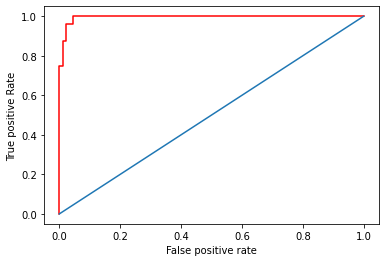

In [118]:
plt.plot(fpr1,tpr1,linestyle='-',color="red")
plt.plot([0,1],[0,1])
plt.xlabel("False positive rate")
plt.ylabel("True positive Rate")
plt.show()

In [121]:
from sklearn.metrics import roc_auc_score
roc_auc_score(Y_test,pos_probabibility_score)

0.995018115942029

# KNN method

In [28]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
#from sklearn.neighbors import KNeighborsRegressor # for regression problem

In [29]:
knn=KNeighborsClassifier()

In [30]:
knn.fit(X_train,Y_train)

KNeighborsClassifier()

In [32]:
Y_pred_knn=knn.predict(X_test)

In [33]:
print("testing performance \n",accuracy_score(Y_test,Y_pred_knn))

testing performance 
 0.9714285714285714


In [34]:
print("classification report \n",classification_report(Y_test,Y_pred_knn))

classification report 
               precision    recall  f1-score   support

           0       0.98      0.98      0.98        92
           1       0.96      0.96      0.96        48

    accuracy                           0.97       140
   macro avg       0.97      0.97      0.97       140
weighted avg       0.97      0.97      0.97       140



In [ ]:
# how can we decide the best value of k or n_neighbors

In [ ]:
# create a function and a graph to decide high accuracy with effective k value

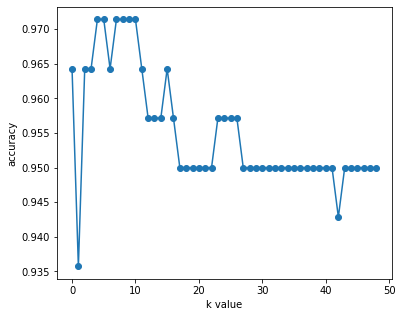

In [39]:
accuracy_k=[]
for k in range(1,50):
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,Y_train)
    Y_pred=knn.predict(X_test)
    accuracy=accuracy_score(Y_test,Y_pred)
    accuracy_k.append(accuracy)

plt.figure(figsize=(6,5))
plt.xlabel("k value")
plt.ylabel("accuracy")
plt.plot(accuracy_k,marker="o")

In [53]:
knn10=KNeighborsClassifier(n_neighbors=11)

In [54]:
knn10.fit(X_train,Y_train)
Y_pred_10=knn10.predict(X_test)
accuracy=accuracy_score(Y_test,Y_pred_10)
accuracy

0.9714285714285714

In [55]:
print("classification report \n",classification_report(Y_test,Y_pred_10))

classification report 
               precision    recall  f1-score   support

           0       0.98      0.98      0.98        92
           1       0.96      0.96      0.96        48

    accuracy                           0.97       140
   macro avg       0.97      0.97      0.97       140
weighted avg       0.97      0.97      0.97       140



# SVM 

In [57]:
from sklearn.svm import SVC
#from sklearn.svm import SVR

In [82]:
svc_model=SVC(C=0.1,kernel='poly',degree=1,gamma='scale')

In [83]:
svc_model.fit(X_train,Y_train)
Y_pred_svc=svc_model.predict(X_test)

In [84]:
accuracy=accuracy_score(Y_test,Y_pred_svc)
accuracy

0.95

In [85]:
print("classification report \n",classification_report(Y_test,Y_pred_svc))

classification report 
               precision    recall  f1-score   support

           0       0.96      0.97      0.96        92
           1       0.94      0.92      0.93        48

    accuracy                           0.95       140
   macro avg       0.95      0.94      0.94       140
weighted avg       0.95      0.95      0.95       140

